<h1>Exploration dataset by Grégoire Corluy</h1>

Python version: 3.10 </br>
Author: Grégoire Corlùy

<h4>Load the data</h4>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime

In [6]:
dataset = pd.read_csv('../datasets/train.csv')
print(f"Size of the dataset is {dataset.shape}")

Size of the dataset is (5044, 39)


Explore the data

In [7]:
#print the labels of the columns
print(dataset.columns)

Index(['Gender', 'Age', 'Connect_Date', 'L_O_S', 'Dropped_Calls', 'tariff',
       'Handset', 'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum',
       'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum',
       'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak',
       'AveWeekend', 'National_calls', 'National mins', 'AveNational',
       'All_calls_mins', 'Dropped_calls_ratio', 'Usage_Band', 'Mins_charge',
       'call_cost_per_min', 'actual call cost', 'Total_call_cost',
       'Total_Cost', 'Tariff_OK', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio',
       'high Dropped calls', 'No Usage', 'target', 'id'],
      dtype='object')


Number of positive and negative targets

In [8]:
print(dataset.head)

<bound method NDFrame.head of      Gender   Age Connect_Date      L_O_S  Dropped_Calls    tariff Handset  \
0         F  50.0     20/05/98  29.200000            2.0  Play 100   BS210   
1         M  25.0     16/12/96  46.533333            1.0   CAT 100  ASAD90   
2         F  46.0     27/08/97  38.066667            1.0    CAT 50    WC95   
3         F  59.0     13/07/98  27.400000            1.0    CAT 50   BS110   
4         F  25.0     08/01/99  21.433333            1.0  Play 300    WC95   
...     ...   ...          ...        ...            ...       ...     ...   
5039      F  16.0     15/09/97  37.433333            2.0   CAT 200  ASAD90   
5040      F  29.0     28/09/96  49.166667            1.0   CAT 100   CAS30   
5041      M  23.0     08/06/99  16.400000            0.0   CAT 200   BS110   
5042      M  46.0     01/03/98  31.866667            2.0  Play 100     S50   
5043      M  61.0     12/11/98  23.333333            0.0   CAT 100     S50   

      Peak_calls_Sum  Peak_mins_S

In [12]:
#count number of ones and zeros as target
nbr_ones = dataset["target"].value_counts()[1]
nbr_zeros = dataset["target"].value_counts()[0]

print(f"number of ones as target: {nbr_ones}")
print(f"number of zeros as target: {nbr_zeros}")

#Check total number of rows is equal to number of zeros and ones
missing_targets = (nbr_ones+nbr_zeros != dataset.shape[0])
Missing_question = "Yes" if missing_targets else "No"

print()
print(f"Missing values in target? {Missing_question}")

number of ones as target: 745
number of zeros as target: 4299

Missing values in target? No


This unbalance has to be taken into account during the train-validation split and during the training.</br>
Can the used model handle this unbalance or will it biased?

Analyze all the other features:</br>
Check for missing values, outliers, distribution of the data

In [13]:
#Gender
print(dataset["Gender"].head)

<bound method NDFrame.head of 0       F
1       M
2       F
3       F
4       F
       ..
5039    F
5040    F
5041    M
5042    M
5043    M
Name: Gender, Length: 5044, dtype: object>


In [15]:
#check for missing values
nbr_Male = dataset["Gender"].value_counts()["M"]
nbr_Female = dataset["Gender"].value_counts()["F"]

print(f"number of males as target: {nbr_Male}")
print(f"number of females as target: {nbr_Female}")

missing_gender= (nbr_Male+nbr_Female != dataset.shape[0])
Missing_question = "Yes" if missing_gender else "No"

print()
print(f"Missing values in gender? {Missing_question}")

number of males as target: 2447
number of females as target: 2597

Missing values in gender? No


Number of males and females is more or less balanced

<h4>Age feature</h4>

In [16]:
print(dataset["Age"].head)

<bound method NDFrame.head of 0       50.0
1       25.0
2       46.0
3       59.0
4       25.0
        ... 
5039    16.0
5040    29.0
5041    23.0
5042    46.0
5043    61.0
Name: Age, Length: 5044, dtype: float64>


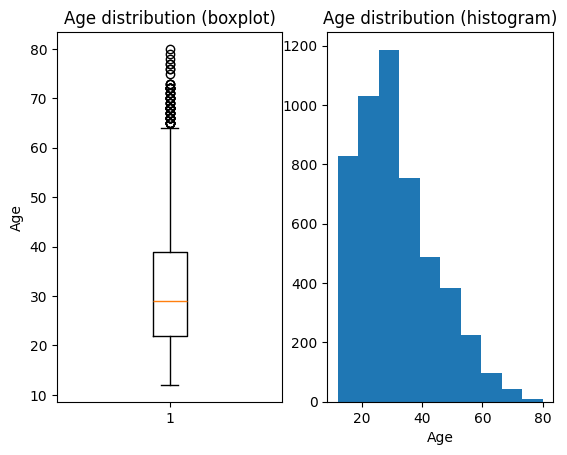

In [38]:
fig, ax = plt.subplots(1,2)
ax[0].boxplot(dataset["Age"])
ax[0].set_title("Age distribution (boxplot)")
ax[0].set_ylabel("Age")
ax[1].hist(dataset["Age"])
ax[1].set_title("Age distribution (histogram)")
ax[1].set_xlabel("Age")
#ax[1].set_ylabel("Counts")
plt.show()

In [27]:
min_age = np.min(dataset["Age"])
max_age = np.max(dataset["Age"])
print(f"Min age {min_age} and max age {max_age}")


Min age 12.0 and max age 80.0


In [39]:
age_NA_count = dataset["Age"].isna().sum()

print(f"Number of NA values in Age: {age_NA_count}")

Number of NA values in Age: 0


There seems to be no missing values in the age feature and no outliers present.

<h4>Connect_Date feature</h4>

Meanng: Last time the user was connected?

In [40]:
#Connect_Date
print(dataset["Connect_Date"].head)

<bound method NDFrame.head of 0       20/05/98
1       16/12/96
2       27/08/97
3       13/07/98
4       08/01/99
          ...   
5039    15/09/97
5040    28/09/96
5041    08/06/99
5042    01/03/98
5043    12/11/98
Name: Connect_Date, Length: 5044, dtype: object>


In [43]:
age_Connect_Date_count = dataset["Connect_Date"].isna().sum()
print(f"number of missing connect date: {age_Connect_Date_count}")

number of missing connect date: 0


In [56]:
#transform all dates to a number
def convert_to_timestamp(date_str):
    return time.mktime(datetime.datetime.strptime(date_str, "%d/%m/%y").timetuple())/3600/24 #expressed in second I think, so I convert it to days

dataset['Connect_Date_tmstp'] = dataset['Connect_Date'].apply(convert_to_timestamp)
print(dataset["Connect_Date_tmstp"].head)
#expressed in days

#shift by removing the minimal value to every observation, try to have smaller numbers
dataset['Connect_Date_tmstp_shift'] = dataset['Connect_Date_tmstp'] - np.min(dataset['Connect_Date_tmstp'])
print(dataset["Connect_Date_tmstp_shift"].head)
#expressed in days relative to the first date in the dataset

<bound method NDFrame.head of 0       10365.916667
1        9845.958333
2       10099.916667
3       10419.916667
4       10598.958333
            ...     
5039    10118.916667
5040     9766.916667
5041    10749.916667
5042    10285.958333
5043    10541.958333
Name: Connect_Date_tmstp, Length: 5044, dtype: float64>
<bound method NDFrame.head of 0        869.958333
1        350.000000
2        603.958333
3        923.958333
4       1103.000000
           ...     
5039     622.958333
5040     270.958333
5041    1253.958333
5042     790.000000
5043    1046.000000
Name: Connect_Date_tmstp_shift, Length: 5044, dtype: float64>


In [55]:
min_Connect_Date = np.min(dataset["Connect_Date_tmstp_shift"])
max_Connect_Date = np.max(dataset["Connect_Date_tmstp_shift"])

print(f"min and max connect date: {min_Connect_Date, max_Connect_Date}")
print(f"data spread over {1460/365} years")

min and max connect date: (0.0, 1460.0)
data spread over 4.0 years


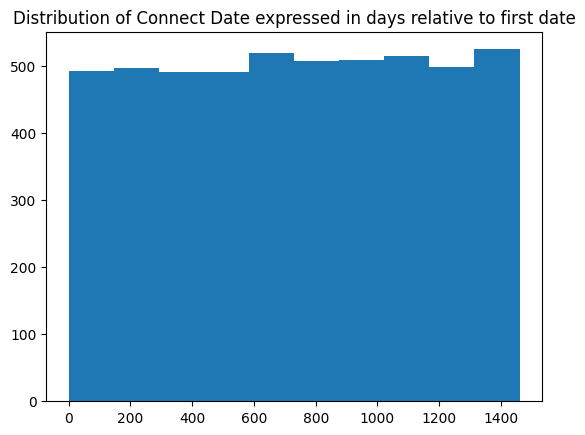

In [57]:
plt.hist(dataset["Connect_Date_tmstp_shift"])
plt.title("Distribution of Connect Date expressed in days relative to first date")
plt.show()

Data very well uniformly distributed

<h4>L_O_S feature</h4>

Meaning? Distance between the user and the receiver? Distance between the user and the antenna?</br>
LOS = Line of sight? </br>
https://www.techtarget.com/whatis/definition/line-of-sight-LOS

In [58]:
print(dataset["L_O_S"].head)

<bound method NDFrame.head of 0       29.200000
1       46.533333
2       38.066667
3       27.400000
4       21.433333
          ...    
5039    37.433333
5040    49.166667
5041    16.400000
5042    31.866667
5043    23.333333
Name: L_O_S, Length: 5044, dtype: float64>


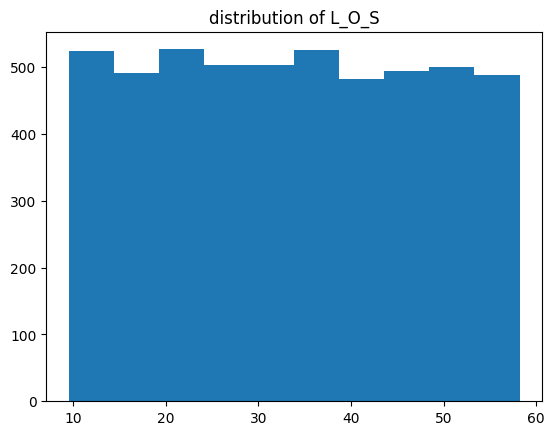

min and max value of L_O_S: (9.533333, 58.2)


In [61]:
plt.hist(dataset["L_O_S"])
plt.title("distribution of L_O_S")
plt.show()

min_LOS = np.min(dataset["L_O_S"])
max_LOS = np.max(dataset["L_O_S"])

print(f"min and max value of L_O_S: {min_LOS, max_LOS}")

In [60]:
LOS_NA_count = dataset["L_O_S"].isna().sum()
print(f"number of missing LOS: {LOS_NA_count}")

number of missin LOS: 0


Seems to be distributed uniformly

<h4>Dropped calls feature</h4>

In [62]:
print(dataset["Dropped_Calls"].head)

<bound method NDFrame.head of 0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5039    2.0
5040    1.0
5041    0.0
5042    2.0
5043    0.0
Name: Dropped_Calls, Length: 5044, dtype: float64>


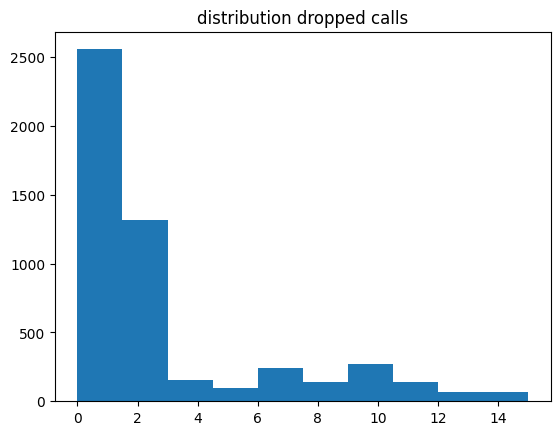

min and max value of dropped calls: (0.0, 15.0)


In [64]:
plt.hist(dataset["Dropped_Calls"])
plt.title("distribution dropped calls")
plt.show()

min_dropped_calls = np.min(dataset["Dropped_Calls"])
max_dropped_calls = np.max(dataset["Dropped_Calls"])
print(f"min and max value of dropped calls: {min_dropped_calls, max_dropped_calls}")

In [65]:
count_NA_dropped_calls = dataset["Dropped_Calls"].isna().sum()
print(f"Number of dropped calls: {count_NA_dropped_calls}")

Number of dropped calls: 0


Follows kind of a Poisson distribution as expected

<h4>Tariff feature </h4>

Name/label of the type of subscription (abonnement) to the phone/telecom company

In [66]:
print(dataset["tariff"].head)

<bound method NDFrame.head of 0       Play 100
1        CAT 100
2         CAT 50
3         CAT 50
4       Play 300
          ...   
5039     CAT 200
5040     CAT 100
5041     CAT 200
5042    Play 100
5043     CAT 100
Name: tariff, Length: 5044, dtype: object>


In [71]:
unique_values_tariff = dataset["tariff"].unique().tolist()
print(f"different types of subscriptions: {unique_values_tariff}")

different types of subscriptions: ['Play 100', 'CAT 100', 'CAT 50', 'Play 300', 'CAT 200']


In [75]:
value_counts_tariff = dataset["tariff"].value_counts()
print("Count of subscriptions for every type of subscription:")
print()
print(value_counts_tariff)

Count of subscriptions for every type of subscription:

tariff
CAT 200     2246
CAT 100     1047
Play 100     788
Play 300     648
CAT 50       315
Name: count, dtype: int64


In [76]:
count_NA_tariff = dataset["tariff"].isna().sum()
print(f"count missing values of tariff: {count_NA_tariff}")

count missing values of tariff: 0


<h4> Handset feature </h4>

Brand of the phone?

In [77]:
print(dataset["Handset"].head)

<bound method NDFrame.head of 0        BS210
1       ASAD90
2         WC95
3        BS110
4         WC95
         ...  
5039    ASAD90
5040     CAS30
5041     BS110
5042       S50
5043       S50
Name: Handset, Length: 5044, dtype: object>


In [79]:
unique_values_handset = dataset["Handset"].unique().tolist()
print(f"different types of handsets: {unique_values_handset}")

different types of handsets: ['BS210', 'ASAD90', 'WC95', 'BS110', 'S50', 'S80', 'CAS30', 'CAS60', 'ASAD170', 'SOP10', 'SOP20']


In [80]:
value_counts_handset = dataset["Handset"].value_counts()
print("Count of handsets per type:")
print()
print(value_counts_handset)

Count of handsets per type:

Handset
S50        1175
BS110       854
S80         741
WC95        686
ASAD170     665
BS210       283
ASAD90      270
CAS30       180
CAS60       106
SOP20        48
SOP10        36
Name: count, dtype: int64


In [81]:
count_NA_handset = dataset["Handset"].isna().sum()
print(f"count missing values of handset: {count_NA_handset}")

count missing values of handset: 0


<h4> Peak calls sum feature </h4>

Don't really understand the meaning of the feature: peak versus calls sum? I understand both terms, but not combined</br>
Peak =?= during "peak" moments (when a lot of people are calling?), because there is also offpeak features.

In [84]:
print(dataset["Peak_calls_Sum"].head)

<bound method NDFrame.head of 0        62.0
1       146.0
2       160.0
3        84.0
4        14.0
        ...  
5039    151.0
5040    135.0
5041    566.0
5042     72.0
5043    148.0
Name: Peak_calls_Sum, Length: 5044, dtype: float64>


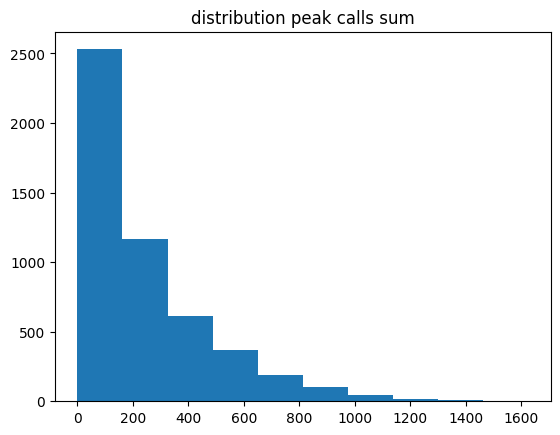

min and max of peak calls sum: (0.0, 1626.0)


In [86]:
plt.hist(dataset["Peak_calls_Sum"])
plt.title("distribution peak calls sum")
plt.show()

min_peak_calls_sum = np.min(dataset["Peak_calls_Sum"])
max_peak_calls_sum = np.max(dataset["Peak_calls_Sum"])
print(f"min and max of peak calls sum: {min_peak_calls_sum, max_peak_calls_sum}")

In [88]:
count_NA_peak_calls_sum = dataset["Peak_calls_Sum"].isna().sum()
print(f"count missing values for peak calls sum: {count_NA_peak_calls_sum}")

count missing values for peak calls sum: 0


Also kind of following a Poisson distribution

<h4> Peak mins sum</h4>

Meaning?</br>
Mins = minutes</br>
But I don't understand the complete feature

In [87]:
print(dataset["Peak_mins_Sum"].head)

<bound method NDFrame.head of 0        153.000000
1        718.800000
2        322.800000
3        317.400001
4        309.600000
           ...     
5039    1169.400001
5040     405.600000
5041    2382.000000
5042     112.200000
5043     403.200000
Name: Peak_mins_Sum, Length: 5044, dtype: float64>


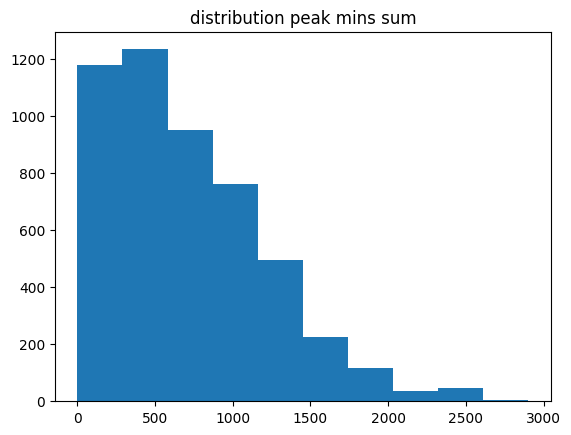

min and max of peaks min sum: (0.0, 2901.600001)


In [89]:
plt.hist(dataset["Peak_mins_Sum"])
plt.title("distribution peak mins sum")
plt.show()

min_peaks_mins_sum = np.min(dataset["Peak_mins_Sum"])
max_peaks_mins_sum = np.max(dataset["Peak_mins_Sum"])

print(f"min and max of peaks min sum: {min_peaks_mins_sum, max_peaks_mins_sum}")

In [90]:
count_NA_peak_mins_sum = dataset["Peak_mins_Sum"].isna().sum()
print(f"count missing values for peak mins sum: {count_NA_peak_mins_sum}")

count missing values for peak mins sum: 0


Again more or less Poisson distributed

<h4>Off peak calls sum </h4>